In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Loading the Data

In [2]:
data = np.loadtxt("dtvir.data", dtype = float)

dataJD = data[:,0]
dataB = data[:,1]

#dataJD
#dataB

Text(0, 0.5, 'Data-B')

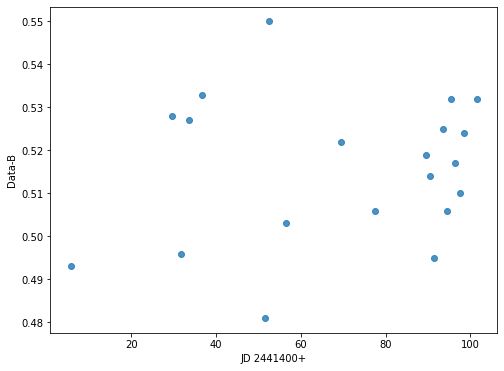

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(dataJD, dataB, alpha=0.8)
plt.xlabel('JD 2441400+')
plt.ylabel('Data-B')

In [4]:
f= dataB - np.mean(dataB)
f

array([-0.02265,  0.01235, -0.01965,  0.01135,  0.01735, -0.03465,
        0.03435, -0.01265,  0.00635, -0.00965,  0.00335, -0.00165,
       -0.02065,  0.00935, -0.00965,  0.01635,  0.00135, -0.00565,
        0.00835,  0.01635])

## Determining the Nyquist Frequency

Nyquist's theorem states that a periodic signal must be sampled at more than twice the highest frequency component of the signal for the perfect reconstruction of the signal.

In [5]:
omega_nyquist = 1/(np.min(np.diff(dataJD))*2) 

omega= np.linspace(0.001, 0.5, 200)
#omega= np.linspace(0.001, 5, 1000)

w = omega
print("Nyquist Frequency is: {x}".format(x = omega_nyquist))

Nyquist Frequency is: 0.5192107995846347


## Defining the functions (Lomb–Scargle periodogram)

In [6]:
w = omega
t = dataJD

N = dataJD.size

del_w = w[-1] - w[0]
del_t = t[N-1] - t[0]


def x(t, w):
    return 2*np.pi*w*t

def sum_cos(N, t, w):
    sum= 0
    for i in range(N):
        sum += np.cos(x(t[i], w))
    return sum

def sum_sin(N, t, w):
    sum = 0
    for i in range(N):
        sum += np.sin(x(t[i], w))
    return sum

def sum_cos_sqr(N, t, w):
    sum = 0
    for i in range(N):
        sum += (np.cos(x(t[i], w)))**2
    return sum

def sum_sin_sqr(N, t, w):
    sum = 0
    for i in range(N):
        sum += (np.sin(x(t[i], w)))**2
    return sum

def sum_cos_sin(N, t, w):
    sum = 0
    for i in range(N):
        sum += (np.cos(x(t[i], w)))*(np.sin(x(t[i], w)))
    return sum

def sum_f_sin(N, t, w):
    sum = 0
    for i in range(N):
        sum += (f[i])*(np.sin(x(t[i], w)))
    return sum

def sum_f_cos(N, t, w):
    sum = 0
    for i in range(N):
        sum += (f[i])*(np.cos(x(t[i], w)))
    return sum

def sum_f_sqr(N, t, w):
    sum = 0
    for i in range(N):
        sum += (f[i])**2
    return sum

def M(N, t, w):
    
    res = sum_cos_sin(N, t, w) - (a0**2)*sum_cos(N, t, w)*sum_sin(N, t, w)
    
    return res

a0 = 1/np.sqrt(N)

def a1(N, t, w):
    return 1/np.sqrt(sum_cos_sqr(N, t, w) - (a0**2)*(sum_cos(N, t, w))**2)

def a2(N, t, w):
    return 1/np.sqrt(sum_sin_sqr(N, t, w) - (a0**2)*(sum_sin(N, t, w))**2 - (a1(N, t, w)**2)*(M(N, t, w))**2)

def c1(N, t, w):
    return a1(N, t, w)*sum_f_cos(N, t, w)

def c2(N, t, w):
    return a2(N, t, w)*sum_f_sin(N, t, w) - a1(N, t, w)*a2(N, t, w)*c1(N, t, w)*M(N, t, w)

def S(N, t, w):
    return (c1(N, t, w)**2 + (c2(N, t, w)**2))/(sum_f_sqr(N, t, w))

def G(N, t, w):
    return -(((N-3)/2)*(np.log(1-S(N, t, w))))

def H(N, t, w):
    return ((N-4)/(N-3))*(G(N, t, w)+ np.exp(-G(N, t, w))-1)

def alpha(N, t, w):
    return ((2*(N-3))*del_t*del_w)/(3*(N-4))

def C(N, t, w):
    return (1 - np.exp(-H(N, t, w)))**alpha(N, t, w)

#M(N, t, w)

## Plotting the functions (from 0 to 0.5)

Text(0, 0.5, 'H(w)')

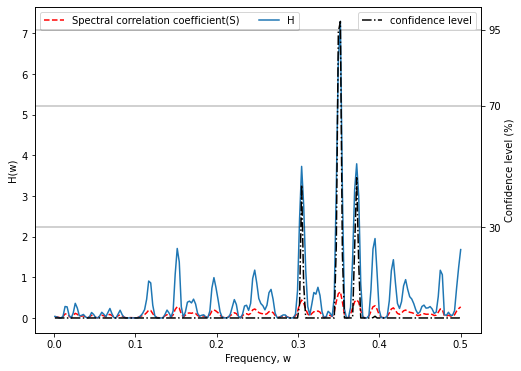

In [45]:
#plt.figure(figsize=(8,6))
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(w, S(N,t,w),'r--', label="Spectral correlation coefficient(S)")
ax1.plot(w, H(N,t,w) , label="H")
ax2 = ax1.twinx()
ax2.plot(w, C(N,t,w)*100, 'k-.', label="confidence level")

ax2.axhline(y=30, linewidth=0.4, color=(0, 0, 0, 0.90))
ax2.axhline(y=70, linewidth=0.4, color=(0, 0, 0, 0.90))
ax2.axhline(y=95, linewidth=0.4, color=(0, 0, 0, 0.90))
ax2.set_yticks([30,70,95])
ax1.legend(loc='best', ncol=2)
ax2.legend(loc='upper right')
ax2.set_ylabel('Confidence level (%)')
ax1.set_xlabel('Frequency, w')
ax1.set_ylabel('H(w)')

## Phase Diagram

Text(0, 0.5, '$\\Delta$B')

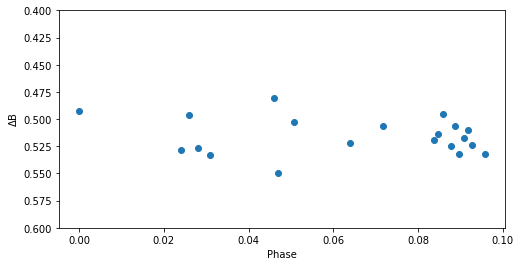

In [73]:
P = 1/omega[np.argmax(H)]  
phase_ = np.abs(t - t[0])/P
phase = np.mod(phase_, 1)

plt.figure(figsize=(8,4))
plt.scatter(phase, dataB)
plt.ylim(0.4,0.6)
plt.gca().invert_yaxis()
plt.xlabel("Phase")
plt.ylabel('$\Delta$B')

## DCDFT from 0.5 to 1 

Text(0, 0.5, 'H(w)')

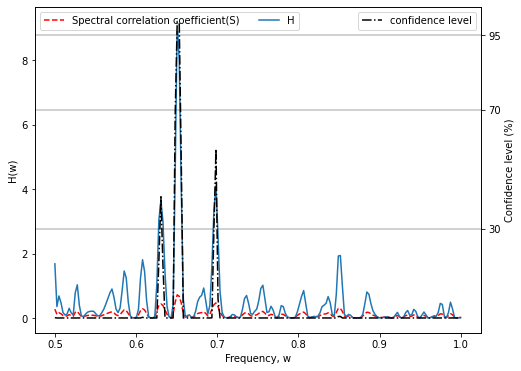

In [44]:
omega_new= np.linspace(0.5, 1, 200)
w_n = omega_new
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(w_n, S(N,t,w_n),'r--', label="Spectral correlation coefficient(S)")
ax1.plot(w_n, H(N,t,w_n) , label="H")
ax2 = ax1.twinx()
ax2.plot(w_n, C(N,t,w_n)*100, 'k-.', label="confidence level")
ax2.axhline(y=30, linewidth=0.4, color=(0, 0, 0, 0.90))
ax2.axhline(y=70, linewidth=0.4, color=(0, 0, 0, 0.90))
ax2.axhline(y=95, linewidth=0.4, color=(0, 0, 0, 0.90))
ax2.set_yticks([30,70,95])
ax1.legend(loc='upper left', ncol=5)
ax2.legend(loc='upper right')
ax2.set_ylabel('Confidence level (%)')
ax1.set_xlabel('Frequency, w')
ax1.set_ylabel('H(w)')

## DCDFT from 0 to 1

Text(0, 0.5, 'H(w)')

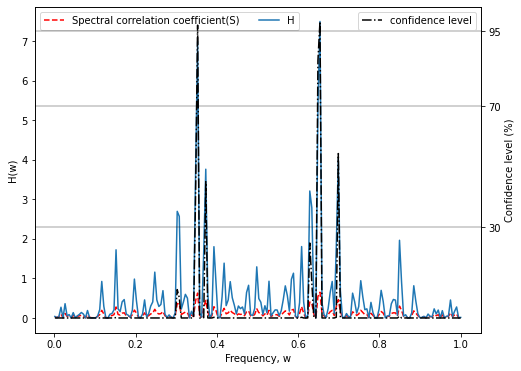

In [43]:
omega_full= np.linspace(0.001, 1, 200)
w_f = omega_full
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(w_f, S(N,t,w_f),'r--', label="Spectral correlation coefficient(S)")
ax1.plot(w_f, H(N,t,w_f) , label="H")
ax2 = ax1.twinx()
ax2.plot(w_f, C(N,t,w_f)*100, 'k-.', label="confidence level")
ax2.axhline(y=30, linewidth=0.4, color=(0, 0, 0, 0.90))
ax2.axhline(y=70, linewidth=0.4, color=(0, 0, 0, 0.90))
ax2.axhline(y=95, linewidth=0.4, color=(0, 0, 0, 0.90))
ax2.set_yticks([30,70,95])
ax1.legend(loc='upper left', ncol=5)
ax2.legend(loc='upper right')
ax2.set_ylabel('Confidence level (%)')
ax1.set_xlabel('Frequency, w')
ax1.set_ylabel('H(w)')

## Result (Report)

We used DCDFT to determine the period of the variable star. DCDFT corresponds to a curve-fitting
approach using a sinusoid-plus-constant model. we can see from the data that the spacing between observations is roughly a multiple of one sidereal day.

As the Nyquist frequency is roughly 0.5 perD, we considered the range of frequency to be from 0 to 0.5 for the first observation.

We have used a test derived by G. R. Quast to calculate the confidence of the result. From the confidence level curve, we can see that there's a prominent peak near 0.35 perD which has more than a 95% confidence rate.

If we draw another plot from 0.5 to 1, we can see there's another prominent peak around 0.65 perD. We can see that one peak is the alias of the other. From further study, we know this phenomenon is called aliasing and we will get other folds going beyond 1 perD. (as we can see below) 

## Going Beyond 1

Text(0, 0.5, 'H(w)')

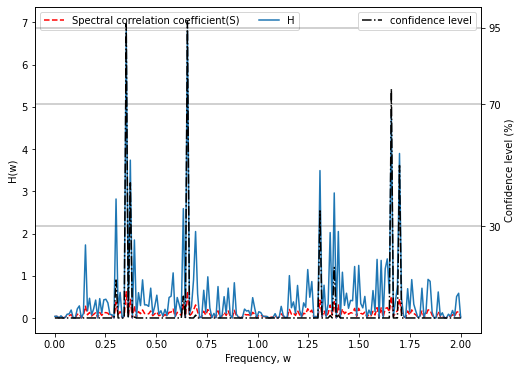

In [42]:
omega_full= np.linspace(0.001, 2, 200)
w_f = omega_full
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(w_f, S(N,t,w_f),'r--', label="Spectral correlation coefficient(S)")
ax1.plot(w_f, H(N,t,w_f) , label="H")
ax2 = ax1.twinx()
ax2.plot(w_f, C(N,t,w_f)*100, 'k-.', label="confidence level")
ax2.axhline(y=30, linewidth=0.4, color=(0, 0, 0, 0.90))
ax2.axhline(y=70, linewidth=0.4, color=(0, 0, 0, 0.90))
ax2.axhline(y=95, linewidth=0.4, color=(0, 0, 0, 0.90))
ax2.set_yticks([30,70,95])
ax1.legend(loc='upper left', ncol=5)
ax2.legend(loc='upper right')
ax2.set_ylabel('Confidence level (%)')
ax1.set_xlabel('Frequency, w')
ax1.set_ylabel('H(w)')